In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('/content/train_v9rqX0R.csv')
df_test = pd.read_csv('/content/test_AbJTz2l.csv')

In [3]:
print((df_train.isnull().mean() * 100).round(2).sort_values(ascending=False))
print((df_test.isnull().mean() * 100).round(2).sort_values(ascending=False))

Outlet_Size                  28.28
Item_Weight                  17.17
Item_Identifier               0.00
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64
Outlet_Size                  28.27
Item_Weight                  17.18
Item_Identifier               0.00
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Location_Type          0.00
Outlet_Type                   0.00
dtype: float64


In [4]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

In [5]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df_train2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
from datetime import datetime

# Assume a column 'Outlet_Establishment_Year' - Train
df_train2['Years_Operating'] = datetime.now().year - df_train2['Outlet_Establishment_Year']

# Assume a column 'Outlet_Establishment_Year' - Test
df_test2['Years_Operating'] = datetime.now().year - df_test2['Outlet_Establishment_Year']

In [8]:
# Labeling Item Identifer
df_train2['Item_Category'] = df_train2['Item_Identifier'].str[:2]
df_train2['Item_Category'].replace({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'}, inplace=True)

# Labeling Item Identifer
df_test2['Item_Category'] = df_test2['Item_Identifier'].str[:2]
df_test2['Item_Category'].replace({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'}, inplace=True)

<ipython-input-8-4f3cd94939e6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train2['Item_Category'].replace({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'}, inplace=True)
<ipython-input-8-4f3cd94939e6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [9]:
# Maping Duplicate Item_Fat_Content
df_train2['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}, inplace=True)

df_test2['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}, inplace=True)

<ipython-input-9-b18b2b1abc5e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train2['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}, inplace=True)
<ipython-input-9-b18b2b1abc5e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [10]:
# Imputation in Item Weight
df_train2['Item_Weight'] = df_train2['Item_Weight'].interpolate(method='nearest', axis=0)
df_test2['Item_Weight'] = df_test2['Item_Weight'].interpolate(method='nearest', axis=0)

<Axes: xlabel='Item_Weight', ylabel='Count'>

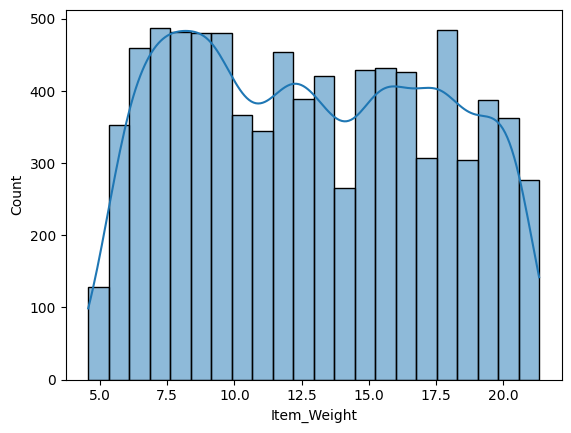

In [11]:
sns.histplot(df_train2['Item_Weight'],kde=True)

In [12]:
# from sklearn.impute import KNNImputer
# knn_imputer = KNNImputer(n_neighbors=10, weights="distance")
# df_train2['Item_Weight']= knn_imputer.fit_transform(df_train2[['Item_Weight']]).ravel()
# df_test2['Item_Weight']= knn_imputer.fit_transform(df_test2[['Item_Weight']]).ravel()

In [13]:
# Imputing Binary Data in Outlet_Size for missing values
df_train2['Outlet_Size'] = df_train2['Outlet_Size'].fillna(df_train2.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode().iloc[0]))
df_test2['Outlet_Size'] = df_test2['Outlet_Size'].fillna(df_test2.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode().iloc[0]))

In [14]:
# Visibility Imputations & Transformation for Skews
from sklearn.preprocessing import PowerTransformer

# # Replace 0 values with NaN
df_train2['Item_Visibility'] = df_train2['Item_Visibility'].replace(0, np.nan)
df_test2['Item_Visibility'] = df_test2['Item_Visibility'].replace(0, np.nan)


df_train2['Item_Visibility'] = df_train2['Item_Visibility'].interpolate(method='linear', axis=0)
df_test2['Item_Visibility'] = df_test2['Item_Visibility'].interpolate(method='linear', axis=0)


pt_yeo = PowerTransformer(method='yeo-johnson')
df_train2['Item_Visibility_Transformed'] = pt_yeo.fit_transform(df_train2['Item_Visibility'].values.reshape(-1, 1)).ravel()
df_test2['Item_Visibility_Transformed'] = pt_yeo.fit_transform(df_test2['Item_Visibility'].values.reshape(-1, 1)).ravel()


In [15]:
# Update MRP values where Item_MRP > Item_Outlet_Sales to match Item_Outlet_Sales
df_train2.loc[df_train2['Item_MRP'] > df_train2['Item_Outlet_Sales'], 'Item_MRP'] = df_train2['Item_Outlet_Sales']

true_cases = df_train2[df_train2['Item_MRP'] > df_train2['Item_Outlet_Sales']]

In [16]:
# Combining Feature

df_train2['MRP_Visibility'] = df_train2['Item_MRP'] * df_train2['Item_Visibility']
df_test2['MRP_Visibility'] = df_test2['Item_MRP'] * df_test2['Item_Visibility']

In [17]:
# Price Per Unit
df_train2['Price_Per_Unit'] = df_train2['Item_MRP'] / df_train2['Item_Weight']
df_test2['Price_Per_Unit'] = df_test2['Item_MRP'] / df_test2['Item_Weight']

In [18]:
# Item Content Type - Classfication
df_train2['Fact_Conetent_Type'] = df_train2['Item_Fat_Content']+" "+df_train2['Item_Category']
df_test2['Fact_Conetent_Type'] = df_test2['Item_Fat_Content']+" "+df_test2['Item_Category']

In [19]:
# Visibility_Per_Price
df_train2['Visibility_Per_Price'] = df_train2['Item_Visibility'] / df_train2['Item_MRP']
df_test2['Visibility_Per_Price'] = df_test2['Item_Visibility'] / df_test2['Item_MRP']

In [20]:
# Weight_Fat_Combination
df_train2['Weight_Fat_Combination'] = df_train2['Item_Weight'] * df_train2['Item_Fat_Content'].map({'Low Fat': 0, 'Regular': 1})
df_test2['Weight_Fat_Combination'] = df_test2['Item_Weight'] * df_test2['Item_Fat_Content'].map({'Low Fat': 0, 'Regular': 1})

In [21]:
# Location_Type_Combination - Classfication
df_train2['Location_Type_Combination'] = df_train2['Outlet_Location_Type'] + '_' + df_train2['Outlet_Type']
df_test2['Location_Type_Combination'] = df_test2['Outlet_Location_Type'] + '_' + df_test2['Outlet_Type']

In [22]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Item_Identifier              8523 non-null   object 
 1   Item_Weight                  8523 non-null   float64
 2   Item_Fat_Content             8523 non-null   object 
 3   Item_Visibility              8523 non-null   float64
 4   Item_Type                    8523 non-null   object 
 5   Item_MRP                     8523 non-null   float64
 6   Outlet_Identifier            8523 non-null   object 
 7   Outlet_Establishment_Year    8523 non-null   int64  
 8   Outlet_Size                  8523 non-null   object 
 9   Outlet_Location_Type         8523 non-null   object 
 10  Outlet_Type                  8523 non-null   object 
 11  Item_Outlet_Sales            8523 non-null   float64
 12  Years_Operating              8523 non-null   int64  
 13  Item_Category     

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encode the 'City' column
df_train2['Item_Identifier'] = le.fit_transform(df_train2['Item_Identifier'])
df_train2['Item_Fat_Content'] = le.fit_transform(df_train2['Item_Fat_Content'])
df_train2['Item_Type'] = le.fit_transform(df_train2['Item_Type'])
df_train2['Outlet_Identifier'] = le.fit_transform(df_train2['Outlet_Identifier'])
df_train2['Outlet_Size'] = le.fit_transform(df_train2['Outlet_Size'])
df_train2['Outlet_Location_Type'] = le.fit_transform(df_train2['Outlet_Location_Type'])
df_train2['Outlet_Type'] = le.fit_transform(df_train2['Outlet_Type'])
df_train2['Item_Category'] = le.fit_transform(df_train2['Item_Category'])
# df_train2['Fact_Conetent_Type'] = le.fit_transform(df_train2['Fact_Conetent_Type'])
# df_train2['Location_Type_Combination'] = le.fit_transform(df_train2['Location_Type_Combination'])

In [37]:
X = df_train2.drop(['Item_Outlet_Sales','Weight_Fat_Combination','Location_Type_Combination','Fact_Conetent_Type'], axis=1)
y = df_train2['Item_Outlet_Sales']

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Item_Identifier              8523 non-null   int64  
 1   Item_Weight                  8523 non-null   float64
 2   Item_Fat_Content             8523 non-null   int64  
 3   Item_Visibility              8523 non-null   float64
 4   Item_Type                    8523 non-null   int64  
 5   Item_MRP                     8523 non-null   float64
 6   Outlet_Identifier            8523 non-null   int64  
 7   Outlet_Establishment_Year    8523 non-null   int64  
 8   Outlet_Size                  8523 non-null   int64  
 9   Outlet_Location_Type         8523 non-null   int64  
 10  Outlet_Type                  8523 non-null   int64  
 11  Years_Operating              8523 non-null   int64  
 12  Item_Category                8523 non-null   int64  
 13  Item_Visibility_Tr

In [39]:
# # Required Libraries

from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score ,mean_squared_error ,root_mean_squared_error ,mean_absolute_error

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize features (for linear models)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

results = []

# Helper to Evaluate Models
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    results.append({
        "Model": name,
        "MAE": round(mae, 4),
        "MSE": round(mse, 4),
        "RMSE": round(rmse,4),
        "R² Score": round(r2, 4)
    })
# # 1. Linear Regression
# lr = LinearRegression()
# lr.fit(X_train_scaled, y_train)
# y_pred_lr = lr.predict(X_test_scaled)
# evaluate_model("Linear Regression", y_test, y_pred_lr)

# # 2. Lasso Regression
# lasso = Lasso(alpha=0.1)
# lasso.fit(X_train_scaled, y_train)
# y_pred_lasso = lasso.predict(X_test_scaled)
# evaluate_model("Lasso Regression", y_test, y_pred_lasso)

# # 3. Ridge Regression
# ridge = Ridge(alpha=1.0)
# ridge.fit(X_train_scaled, y_train)
# y_pred_ridge = ridge.predict(X_test_scaled)
# evaluate_model("Ridge Regression", y_test, y_pred_ridge)

# # 4. ElasticNet Regression
# elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
# elastic.fit(X_train_scaled, y_train)
# y_pred_elastic = elastic.predict(X_test_scaled)
# evaluate_model("ElasticNet Regression", y_test, y_pred_elastic)

# # 5. Random Forest Regressor (no scaling needed)
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)
# evaluate_model("Random Forest", y_test, y_pred_rf)

# 6. XGBoost Regressor (no scaling needed)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate_model("XGBoost", y_test, y_pred_xgb)

# Convert to DataFrame for tabular view
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
print(results_df)


     Model       MAE           MSE       RMSE  R² Score
0  XGBoost  741.2196  1.113568e+06  1055.2573    0.5903


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Hyperparameter Grid
xgb_param_grid = {
    'xgb__n_estimators': [100, 200 , 1000],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 6, 10],
    'xgb__booster' : ['gbtree'],
    'xgb__tree' : ['auto'],
    'xgb__objective' : ['reg:squarederror'],
    # 'xgb__min_child_weight' :[3,5],
    # 'xgb__gamma' : [0.1],
    # 'xgb__subsample' : [0.8],
    # 'xgb__colsample_bytree' : [0.8],
    # 'xgb__reg_alpha' : [0.1],
    # 'xgb__reg_lambda' : [0.1]

}

# Create Pipeline
xgb_pipeline = Pipeline([
    ('xgb', XGBRegressor(random_state=42))
])

# Grid Search
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='r2', n_jobs=-1)
xgb_grid_search.fit(X, y)

# Best XGBoost Model
print("Best XGBoost R² Score:", xgb_grid_search.best_score_)
print("Best XGBoost Parameters:", xgb_grid_search.best_params_)

# Get Top Features Based on Feature Importances
xgb_best_model = xgb_grid_search.best_estimator_
xgb_importance = xgb_best_model.named_steps['xgb'].feature_importances_
xgb_top_features = pd.Series(xgb_importance, index=X.columns).nlargest(5)

# Retrain with Top 5 Features
X_top_xgb = X[xgb_top_features.index]
xgb_best_model.fit(X_top_xgb, y)

# Predict and Evaluate Metrics
y_pred_xgb = xgb_best_model.predict(X_top_xgb)
print("XGBoost MSE:", mean_squared_error(y, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y, y_pred_xgb)))
print("XGBoost R²:", r2_score(y, y_pred_xgb))

In [ ]:
pd.Series(xgb_importance, index=X.columns).sort_values(ascending=False)

In [ ]:
# Dictionary to store one encoder per column
encoders = {}

# List of object columns to encode
cols_to_encode = [
    'Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
    'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category',
]

# Encode each column and store the encoder
for col in cols_to_encode:
    le = LabelEncoder()
    df_test2[col] = le.fit_transform(df_test2[col].astype(str))
    encoders[col] = le  # Save for decoding

In [ ]:
X_test_data = df_test2

In [ ]:
# Subset the X_test_data with the top 5 features
X_top_5 = X_test_data[xgb_top_features.index]

# Use the trained XGBoost model to make predictions on the new data
y_pred_new = xgb_best_model.predict(X_top_5)

# Output the predictions
print("Predictions for new data:", y_pred_new)

In [ ]:
# Decode each column using its corresponding encoder
for col in cols_to_encode:
    if col in encoders:
        df_test2[col] = encoders[col].inverse_transform(df_test2[col])

In [ ]:
# Select required columns correctly
sub_xgb = df_test2[['Item_Identifier', 'Outlet_Identifier']].copy()

# Add predicted values
sub_xgb['Item_Outlet_Sales'] = y_pred_new

# Sort by predictions
sub_xgb = sub_xgb.sort_values(by='Item_Outlet_Sales', ascending=True)

# Optional: Reset index
sub_xgb.reset_index(drop=True, inplace=True)

# Save to CSV without including the index in the CSV file
sub_xgb.to_csv('/content/xgb_sumi.csv', index=False)

In [ ]:
sub_xgb.head()